<a href="https://colab.research.google.com/github/AbuKaisar24/Neural-Network/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

Using TensorFlow backend.


In [3]:
img_width, img_height = 224, 224

In [13]:
train_data_dir = '/content/drive/My Drive/Colab Notebooks/image classification/v_data/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/image classification/v_data/test'
nb_train_samples =400 
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [14]:
if K.image_data_format() == 'channels_first': #Returns the default image data format convention.
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [15]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 223, 223, 32)      416       
_________________________________________________________________
activation_6 (Activation)    (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_7 (Activation)    (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 54, 54, 64)       

In [17]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['acc']) 

In [18]:
train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)

In [19]:
test_datagen = ImageDataGenerator(rescale=1. / 255) 

In [20]:
train_generator = train_datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 

Found 400 images belonging to 2 classes.


In [21]:
validation_generator = test_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 

Found 100 images belonging to 2 classes.


In [22]:
history = model.fit_generator( 
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size, 
    epochs=epochs, 
    validation_data=validation_generator, 
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
25/25 [==============================] - 186s 7s/step - loss: 0.7394 - acc: 0.6450 - val_loss: 0.4592 - val_acc: 0.8229
Epoch 2/10
25/25 [==============================] - 6s 243ms/step - loss: 0.5288 - acc: 0.7425 - val_loss: 0.3599 - val_acc: 0.8810
Epoch 3/10
25/25 [==============================] - 6s 236ms/step - loss: 0.4405 - acc: 0.8125 - val_loss: 0.3963 - val_acc: 0.8333
Epoch 4/10
25/25 [==============================] - 6s 238ms/step - loss: 0.3452 - acc: 0.8625 - val_loss: 0.2647 - val_acc: 0.8929
Epoch 5/10
25/25 [==============================] - 6s 234ms/step - loss: 0.3300 - acc: 0.8825 - val_loss: 0.2113 - val_acc: 0.8929
Epoch 6/10
25/25 [==============================] - 6s 238ms/step - loss: 0.3186 - acc: 0.8825 - val_loss: 0.2949 - val_acc: 0.8810
Epoch 7/10
25/25 [==============================] - 6s 232ms/step - loss: 0.2987 - acc: 0.8825 - val_loss: 0.2415 - val_acc: 0.8214
Epoch 8/10
25/25 [==============================] - 6s 240ms/step - loss: 0.2

In [24]:
model.save('model_saved.h5') 

In [25]:
import matplotlib.pyplot as plt

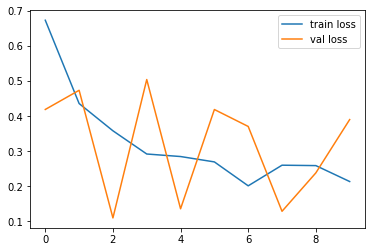

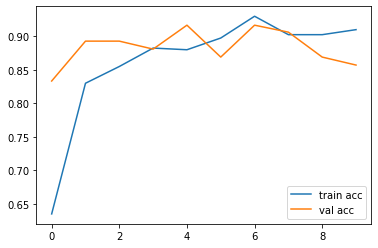

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
model= load_model('model_saved.h5')

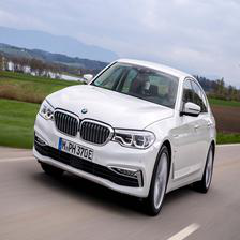

In [27]:
img = image.load_img('/content/drive/My Drive/Colab Notebooks/image classification/v_data/test/cars/18.jpg', target_size=(240,240))
img


In [28]:
img = image.img_to_array(img)

In [29]:
img

array([[[183., 195., 221.],
        [183., 195., 221.],
        [184., 196., 222.],
        ...,
        [201., 209., 228.],
        [202., 210., 229.],
        [203., 211., 230.]],

       [[185., 197., 223.],
        [185., 197., 223.],
        [185., 197., 223.],
        ...,
        [201., 209., 228.],
        [201., 209., 228.],
        [201., 209., 228.]],

       [[187., 199., 223.],
        [187., 199., 225.],
        [186., 198., 224.],
        ...,
        [203., 211., 230.],
        [201., 209., 228.],
        [200., 208., 227.]],

       ...,

       [[166., 151., 144.],
        [166., 151., 144.],
        [166., 151., 144.],
        ...,
        [134., 124., 123.],
        [136., 126., 125.],
        [136., 126., 125.]],

       [[165., 150., 143.],
        [165., 150., 143.],
        [166., 151., 144.],
        ...,
        [133., 123., 122.],
        [133., 123., 122.],
        [133., 123., 122.]],

       [[163., 148., 141.],
        [163., 148., 141.],
        [165., 1